# 1. Configuración del Entorno y Carga de Datos
Explicación: En este primer paso, cargaremos las librerías fundamentales del ecosistema tidyverse (que incluye ggplot2 para gráficos y dplyr para manipulación). También cargamos el dataset y echamos un primer vistazo crudo.

In [6]:
# Instalar y cargar librerías necesarias (si no están instaladas)
if(!require(tidyverse)) install.packages("tidyverse")
if(!require(ggthemes)) install.packages("ggthemes") # Para diseños bonitos
if(!require(corrplot)) install.packages("corrplot") # Para correlaciones

library(tidyverse)
library(ggthemes)
library(corrplot)

# Cargar el dataset
# Asegúrate de que el nombre del archivo coincida con el que subiste
df <- read.csv("used_cars_data.csv", stringsAsFactors = FALSE)

# Vista preliminar
head(df)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,,1.75
2,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
3,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
4,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,,6.00
5,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,,17.74
6,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5,,2.35


#Resultado de la salida:
Verás que tenemos columnas como Mileage, Engine y Power que son de tipo "character" (texto) porque incluyen unidades (ej: "26.6 km/kg"), lo cual es un problema para calcular medias o graficar. También notarás que la columna New_Price tiene muchos valores vacíos.

# 2. Limpieza de Datos (Data Cleaning)
Explicación del bloque: Este es el paso más importante. Vamos a realizar las siguientes acciones:

Eliminar New_Price: Esta columna tiene demasiados datos faltantes y no aporta valor.

Eliminar filas sin Price: Si queremos predecir el precio, no nos sirven los coches que no lo tienen.

Conversión de unidades: Quitaremos los textos "kmpl", "CC", "bhp" de las columnas numéricas para convertirlas en números reales.

Gestión de nulos: Eliminaremos las filas que queden con datos corruptos (NA).

In [7]:
# Limpieza profunda del dataset (Versión Definitiva)
df_clean <- df %>%
  select(-New_Price) %>%
  filter(!is.na(Price)) %>% # Eliminar filas sin Price
  mutate(
    # Conversión a Numérico y limpieza de unidades de texto
    Mileage = as.numeric(str_extract(Mileage, "[0-9.]+")),
    Engine  = as.numeric(str_extract(Engine, "[0-9.]+")),
    Power   = as.numeric(str_extract(Power, "[0-9.]+")),

    # Conversión a Factor (Categórico)
    Fuel_Type    = as.factor(Fuel_Type),
    Transmission = as.factor(Transmission),
    Owner_Type   = as.factor(Owner_Type),
    Location     = as.factor(Location)
  ) %>%

  # Eliminar cualquier fila que tenga NA en las variables clave
  na.omit() %>%

  # Crear el nuevo ID consecutivo (ID) y eliminar S.No. original
  mutate(ID = row_number()) %>%
  select(-S.No.) %>%
  select(ID, everything()) # Mover ID a la primera columna

# Verificamos cómo quedó el dataset limpio
cat("### Resultado Final de la Limpieza ###\n")
cat("Dimensiones originales (Filas x Columnas):", dim(df), "\n")
cat("Dimensiones tras limpieza (Filas x Columnas):", dim(df_clean), "\n")
cat("-------------------------------------------------------------------\n")

# AÑADIDO: Resumen COMPLETO del nuevo Dataframe df_clean
cat("Resumen Estadístico COMPLETO (Incluye Variables Numéricas y Categóricas):\n")
summary(df_clean)

cat("\nPrimeras 10 Filas del Dataset Limpio y Definitivo:\n")
# AÑADIDO: Imprime TODAS las columnas de las primeras 10 filas
print(df_clean %>% head(10))

### Resultado Final de la Limpieza ###
Dimensiones originales (Filas x Columnas): 7253 14 
Dimensiones tras limpieza (Filas x Columnas): 5872 13 
-------------------------------------------------------------------
Resumen Estadístico COMPLETO (Incluye Variables Numéricas y Categóricas):


       ID           Name                 Location         Year     
 Min.   :   1   Length:5872        Mumbai    : 775   Min.   :1998  
 1st Qu.:1469   Class :character   Hyderabad : 718   1st Qu.:2012  
 Median :2936   Mode  :character   Kochi     : 645   Median :2014  
 Mean   :2936                      Coimbatore: 629   Mean   :2013  
 3rd Qu.:4404                      Pune      : 594   3rd Qu.:2016  
 Max.   :5872                      Delhi     : 545   Max.   :2019  
                                   (Other)   :1966                 
 Kilometers_Driven    Fuel_Type       Transmission           Owner_Type  
 Min.   :    171   CNG     :  55   Automatic:1702   First         :4839  
 1st Qu.:  33422   Diesel  :3152   Manual   :4170   Fourth & Above:   7  
 Median :  52609   Electric:   0                    Second        : 925  
 Mean   :  58317   LPG     :  10                    Third         : 101  
 3rd Qu.:  72403   Petrol  :2655                                         
 Max.   :650


Primeras 10 Filas del Dataset Limpio y Definitivo:
   ID                                Name   Location Year Kilometers_Driven
1   1              Maruti Wagon R LXI CNG     Mumbai 2010             72000
2   2    Hyundai Creta 1.6 CRDi SX Option       Pune 2015             41000
3   3                        Honda Jazz V    Chennai 2011             46000
4   4                   Maruti Ertiga VDI    Chennai 2012             87000
5   5     Audi A4 New 2.0 TDI Multitronic Coimbatore 2013             40670
6   6     Hyundai EON LPG Era Plus Option  Hyderabad 2012             75000
7   7              Nissan Micra Diesel XV     Jaipur 2013             86999
8   8   Toyota Innova Crysta 2.8 GX AT 8S     Mumbai 2016             36000
9   9 Volkswagen Vento Diesel Comfortline       Pune 2013             64430
10 10      Tata Indica Vista Quadrajet LS    Chennai 2012             65932
   Fuel_Type Transmission Owner_Type Mileage Engine  Power Seats Price
1        CNG       Manual      First   26

# Resultado de la salida:
Al ejecutar el código, la salida será mucho más detallada y mostrará lo siguiente:

Dimensiones: Confirmación del número exacto de filas eliminadas.

summary(df_clean):

Para las columnas numéricas (Price, Engine, Power), confirmará la Media, Mediana, y rangos sin ningún valor NA.

Para las columnas categóricas (Fuel_Type, Transmission), mostrará la frecuencia de los niveles (ej., cuántos son Diesel, cuántos Manual), lo cual es una excelente vista previa del EDA.

df_clean %>% head(10): Esta es la parte más importante. Verás una tabla con TODAS las columnas (incluyendo ID, Name, Location, etc.) para las primeras 10 filas, demostrando visualmente que:

La columna ID es consecutiva (1, 2, 3...).

Las unidades (kmpl, bhp, CC) han desaparecido de las columnas y son números limpios.

La columna New_Price y S.No. ya no existen.



# 3. EDA: Análisis Exploratorio de Datos Detallado
Explicación del bloque: Ya con el dataframe limpio (df_clean listo), exploramos estadísticamente las distribuciones y frecuencias de las variables más importantes. Este análisis nos permite entender la demografía del dataset y la relación entre las características y la variable objetivo (Price), antes de pasar a la visualización

In [8]:
# Resumen de variables numéricas clave
cat("### Resumen Estadístico Numérico Clave (Variables predictoras) ###\n")
df_clean %>%
  select(Year, Kilometers_Driven, Mileage, Engine, Power, Price) %>%
  summary()

# Análisis de Correlación: ¿Qué variables influyen más en el precio?
# Muestra el coeficiente de correlación de Pearson de Price con el resto.
cor_precio <- cor(df_clean %>% select(Year, Kilometers_Driven, Mileage, Engine, Power, Price))
cat("\nCorrelación de 'Price' con otras variables numéricas:\n")
# Imprimimos solo la fila de correlaciones con 'Price'
print(cor_precio["Price", ])

# Conteo y Distribución de variables categóricas
cat("\n### Conteo de Variables Categóricas (Frecuencias) ###\n")
cat("\n1. Tipos de Combustible:\n")
print(table(df_clean$Fuel_Type))

cat("\n2. Tipos de Transmisión:\n")
print(table(df_clean$Transmission))

cat("\n3. Antigüedad del Propietario (Owner_Type):\n")
print(table(df_clean$Owner_Type))

cat("\n4. Conteo de Coches por Sede (Top 5 Locations):\n")
df_clean %>%
  count(Location) %>%
  arrange(desc(n)) %>%
  head(5) %>%
  print()

### Resumen Estadístico Numérico Clave (Variables predictoras) ###


      Year      Kilometers_Driven    Mileage          Engine    
 Min.   :1998   Min.   :    171   Min.   : 0.00   Min.   : 624  
 1st Qu.:2012   1st Qu.:  33422   1st Qu.:15.26   1st Qu.:1198  
 Median :2014   Median :  52609   Median :18.20   Median :1496  
 Mean   :2013   Mean   :  58317   Mean   :18.28   Mean   :1626  
 3rd Qu.:2016   3rd Qu.:  72403   3rd Qu.:21.10   3rd Qu.:1991  
 Max.   :2019   Max.   :6500000   Max.   :33.54   Max.   :5998  
     Power           Price        
 Min.   : 34.2   Min.   :  0.440  
 1st Qu.: 75.0   1st Qu.:  3.518  
 Median : 97.7   Median :  5.750  
 Mean   :113.3   Mean   :  9.604  
 3rd Qu.:138.1   3rd Qu.: 10.000  
 Max.   :560.0   Max.   :160.000  


Correlación de 'Price' con otras variables numéricas:
             Year Kilometers_Driven           Mileage            Engine 
      0.299475450      -0.008248536      -0.341651955       0.658047226 
            Power             Price 
      0.772842899       1.000000000 

### Conteo de Variables Categóricas (Frecuencias) ###

1. Tipos de Combustible:

     CNG   Diesel Electric      LPG   Petrol 
      55     3152        0       10     2655 

2. Tipos de Transmisión:

Automatic    Manual 
     1702      4170 

3. Antigüedad del Propietario (Owner_Type):

         First Fourth & Above         Second          Third 
          4839              7            925            101 

4. Conteo de Coches por Sede (Top 5 Locations):
    Location   n
1     Mumbai 775
2  Hyderabad 718
3      Kochi 645
4 Coimbatore 629
5       Pune 594


# 4. Visualización de Datos (Gráficas)
Utilizando las conclusiones anteriores, generamos 5 gráficos que resumen la información más importante para la exposición.

# Gráfica 1:
### Distribución del Precio (Histograma Logarítmico)
Explicación: Muestra la forma de la variable objetivo. La escala logarítmica maneja la gran diferencia entre precios bajos y altos.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


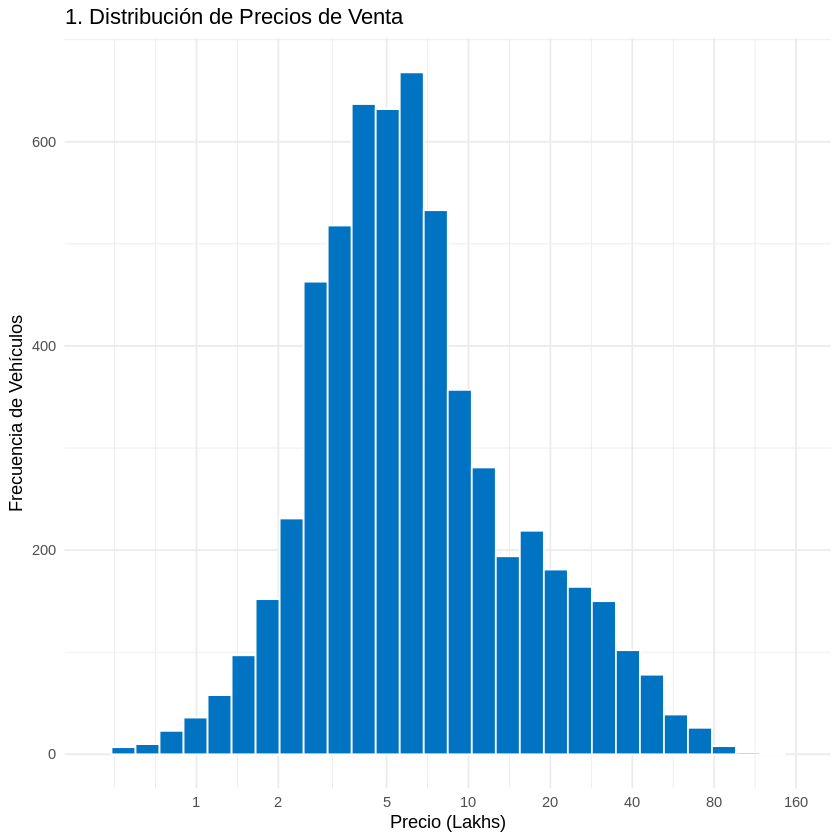

In [27]:
# Usamos la librería 'scales' para formatear los números
library(scales)

# Determinamos el precio máximo dinámicamente
max_data_price <- max(df_clean$Price) # Asume que es 160.0

ggplot(df_clean, aes(x = Price)) +
  # El histograma muestra la frecuencia de los precios
  geom_histogram(bins = 30, fill = "#0073C2", color = "white") +

  # APLICACIÓN DE LA ESCALA LOGARÍTMICA
  scale_x_log10(
    # Fija los límites explícitamente: desde el mínimo hasta el valor máximo exacto.
    limits = c(min(df_clean$Price[df_clean$Price > 0]), max_data_price),

    # Etiquetas concisas: se mantiene 80 y se finaliza con el máximo 160.
    breaks = c(1, 2, 5, 10, 20, 40, 80, 160),
    labels = comma
  ) +
  theme_minimal() +
  labs(
    title = "1. Distribución de Precios de Venta ",
    x = "Precio (Lakhs)",
    y = "Frecuencia de Vehículos"
  )

# Gráfica 2:
### Relación Potencia vs Precio, Segmentado por Transmisión
Utilizaremos un gráfico de dispersión (Scatter Plot) para visualizar la correlación entre la Potencia del motor (Power) y el Precio (Price) del vehículo, distinguiendo visualmente entre la Transmisión Manual y la Automática. Se añade una línea de tendencia para confirmar la fuerza de la relación.


`geom_smooth()` using formula = 'y ~ x'


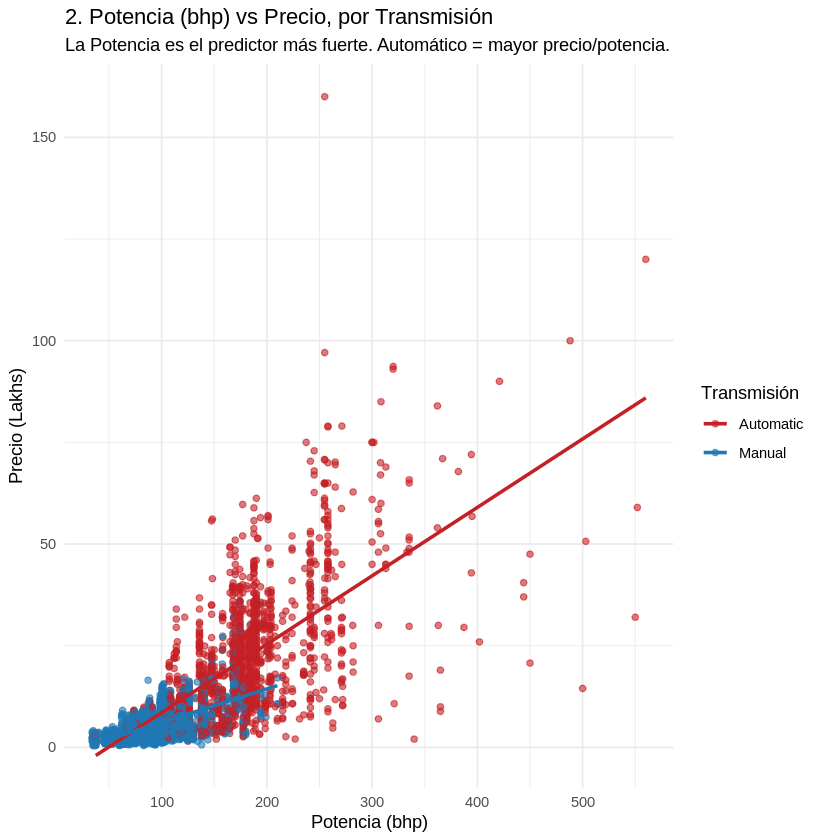

In [21]:
ggplot(df_clean, aes(x = Power, y = Price, color = Transmission)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +

  # Asignación de colores manuales y contrastantes
  scale_color_manual(values = c("Automatic" = "#C42126", "Manual" = "#1F78B4")) + # Rojo y Azul

  theme_minimal() +
  labs(title = "2. Potencia (bhp) vs Precio, por Transmisión",
       subtitle = "La Potencia es el predictor más fuerte. Automático = mayor precio/potencia.",
       x = "Potencia (bhp)", y = "Precio (Lakhs)", color = "Transmisión")

# Explicación de la Gráfica 2:

Los vehículos Automáticos (Rojo) tienden a ocupar la zona de mayor precio y mayor potencia del gráfico.

Los vehículos Manuales (Azul) se concentran principalmente en el rango bajo y medio de potencia/precio.

Esto demuestra que la Transmisión no solo es un factor en sí mismo, sino que está altamente correlacionada con el segmento de mercado del vehículo (lujo/rendimiento vs. económico).

Significado de la Raya Central (geom_smooth): La raya central (línea de tendencia) representa la Regresión Lineal (método 'lm') para cada tipo de transmisión. Muestra la tendencia general del precio a medida que aumenta la potencia.


# Gráfica 3:
### Efecto de la Depreciación (Precio Promedio por Año)
Este gráfico de líneas muestra el efecto de la Depreciación analizando la evolución del Precio Promedio de los coches en función de su Año de fabricación (Year). Es vital para entender cómo la antigüedad afecta al valor de reventa.

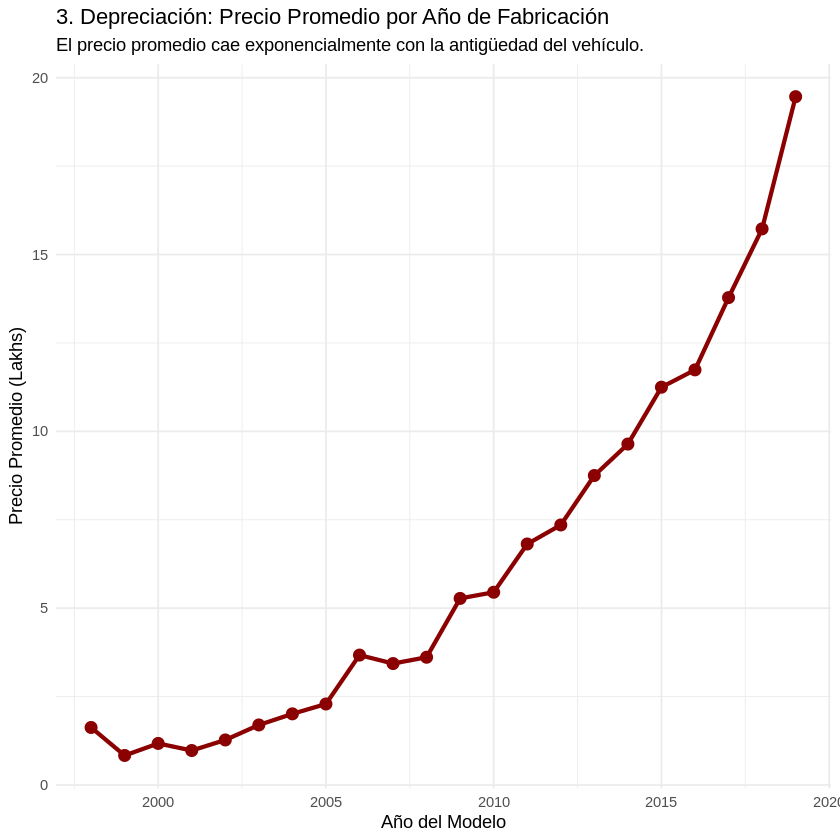

In [22]:
df_avg_price <- df_clean %>%
  group_by(Year) %>%
  summarise(Avg_Price = mean(Price))

ggplot(df_avg_price, aes(x = Year, y = Avg_Price)) +
  geom_line(color = "darkred", linewidth = 1.2) +
  geom_point(color = "darkred", size = 3) +
  theme_minimal() +
  labs(title = "3. Depreciación: Precio Promedio por Año de Fabricación",
       subtitle = "El precio promedio cae exponencialmente con la antigüedad del vehículo.",
       x = "Año del Modelo", y = "Precio Promedio (Lakhs)")

# Explicación de la Gráfica 3:
La gráfica ilustra claramente el fenómeno de la depreciación. Se observa una caída constante y pronunciada en el precio promedio a medida que se retrocede en los años de fabricación. Los coches más antiguos (anteriores a 2010) tienen un precio promedio significativamente menor, mientras que los modelos recientes (2018-2019) retienen el valor más alto. Esta tendencia es fundamental para cualquier modelo predictivo y confirma la correlación positiva entre Year y Price.

# Gráfica 4:
### Distribución de Vehículos por Tipo de Combustible (Agrupada)
Descripción: Este gráfico de torta muestra la proporción del mercado después de agrupar los combustibles minoritarios (CNG, LPG, y Electric) en una sola categoría ("Otros Combustibles"). Esto simplifica la visualización y confirma que el mercado se reparte principalmente entre Diesel y Petrol.







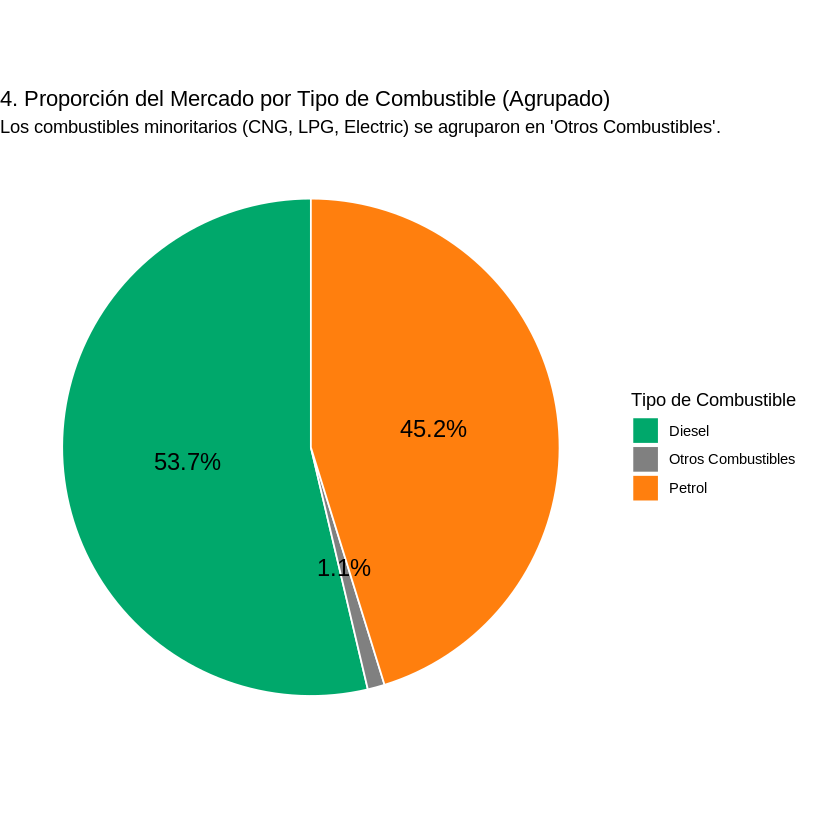

In [29]:
# 1. Crear la nueva variable agrupada en df_clean
df_clean_grouped <- df_clean %>%
  mutate(
    Fuel_Group = case_when(
      Fuel_Type == "Diesel" ~ "Diesel",
      Fuel_Type == "Petrol" ~ "Petrol",
      # Agrupamos CNG, LPG y Electric como "Otros"
      TRUE ~ "Otros Combustibles"
    )
  )

# 2. Calcular las cuentas y porcentajes para la torta
df_pie_data <- df_clean_grouped %>%
  group_by(Fuel_Group) %>%
  summarise(n = n()) %>%
  ungroup() %>%
  mutate(
    percentage = n / sum(n),
    label = paste0(round(percentage * 100, 1), "%")
  )

# 3. Generar la gráfica
ggplot(df_pie_data, aes(x = "", y = n, fill = Fuel_Group)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +

  # Añadimos etiquetas de porcentaje
  geom_text(aes(label = label),
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 5) +

  # Asignación de colores manuales para las 3 categorías principales
  scale_fill_manual(values = c("Diesel" = "#00A86B",
                               "Petrol" = "#FF7F0E",
                               "Otros Combustibles" = "#808080")) + # Gris para 'Otros'
  theme_void() + # Tema limpio
  labs(
    title = "4. Proporción del Mercado por Tipo de Combustible (Agrupado)",
    subtitle = "Los combustibles minoritarios (CNG, LPG, Electric) se agruparon en 'Otros Combustibles'.",
    fill = "Tipo de Combustible"
  )

# Explicación de la Gráfica 4 :
El gráfico de torta simplificado ahora comunica la proporción del volumen del mercado de manera mucho más efectiva:

Diesel y Petrol acaparan la mayor parte del mercado de coches usados.

La porción "Otros Combustibles" es muy pequeña, lo que confirma que, aunque estas opciones existen, su volumen en el mercado de segunda mano es insignificante y no necesita análisis individual en esta etapa.

# Feature Engineering: Preparación Final del Dataset
Objetivo y Explicación
El objetivo de este paso es transformar las variables originales en un formato más útil y predictivo para el modelo de IA. Se realizaron cuatro transformaciones clave:

Car_Age (Edad) y Power_per_Liter (Rendimiento) se crearon a partir de variables existentes para capturar mejor la depreciación y el rendimiento.

Log_Price (Transformación Logarítmica) se creó para normalizar la distribución sesgada del precio, lo cual es crucial para que los modelos de regresión funcionen de manera eficiente.

One-Hot Encoding se aplicó a Transmission para crear las columnas binarias Transmission_Automatic y Transmission_Manual (1 o 0), ya que el Machine Learning requiere datos numéricos para las variables categóricas.

In [46]:
# El dataframe df_clean (limpio) debe estar cargado para este bloque.
library(dplyr)
library(stringr)

df_ai_ready <- df_clean %>%
  mutate(
    # 1. Creación de variables de ingeniería
    Brand = word(Name, 1), # Nueva columna 'Brand'
    Car_Age = 2025 - Year, # Nueva columna 'Car_Age'
    Power_per_Liter = Power / (Engine / 1000), # Nueva columna 'Power_per_Liter'

    # 2. Variable Objetivo transformada
    Log_Price = log(Price),

    # 3. OPTIMIZACIÓN FINAL: Columna Binaria ÚNICA 'Transmission'
    Transmission_Binary = ifelse(Transmission == "Automatic", 1, 0)
  ) %>%

  # 4. Selección y Reordenamiento final (quitando SOLO la Transmission original de texto)
  select(
    # Eliminamos SOLO la columna de Transmission original (texto)
    -Transmission,

    # Reordenamos las más importantes al principio (Name y Year se mantienen al final por defecto)
    ID, Brand, Car_Age, Power, Power_per_Liter, Log_Price, Price,

    # RENOMBRAMOS LA VARIABLE BINARIA CREADA A 'Transmission'
    Transmission = Transmission_Binary,

    # El resto de variables
    Kilometers_Driven, Fuel_Type, Location, Owner_Type,
    Mileage, Engine, Seats,

    # Mantenemos las columnas originales para referencia
    Name, Year
  )

  # Muestra las primeras 5 filas del dataframe final listo para IA.
print(df_ai_ready %>% head(5))

  ID                             Name   Location Year Kilometers_Driven
1  1           Maruti Wagon R LXI CNG     Mumbai 2010             72000
2  2 Hyundai Creta 1.6 CRDi SX Option       Pune 2015             41000
3  3                     Honda Jazz V    Chennai 2011             46000
4  4                Maruti Ertiga VDI    Chennai 2012             87000
5  5  Audi A4 New 2.0 TDI Multitronic Coimbatore 2013             40670
  Fuel_Type Owner_Type Mileage Engine  Power Seats Price   Brand Car_Age
1       CNG      First   26.60    998  58.16     5  1.75  Maruti      15
2    Diesel      First   19.67   1582 126.20     5 12.50 Hyundai      10
3    Petrol      First   18.20   1199  88.70     5  4.50   Honda      14
4    Diesel      First   20.77   1248  88.76     7  6.00  Maruti      13
5    Diesel     Second   15.20   1968 140.80     5 17.74    Audi      12
  Power_per_Liter Log_Price Transmission
1        58.27655 0.5596158            0
2        79.77244 2.5257286            0
3      

# Conclusión del Feature Engineering

Objetivo y Explicación
Este bloque ejecuta la limpieza final justo antes de la división de los datos (entrenamiento/prueba). La eliminación de Name, Year, y Price garantiza que el dataset final (df_ai_ready_final) contenga solo las variables predictivas optimizadas y la única variable objetivo necesaria (Log_Price).

# (OPCIONAL) CONTENEDOR DE LIMPIEZA:


In [47]:
# Contenedor para eliminar columnas no necesarias antes del modelado de IA.
# Ejecutar este bloque de código eliminará permanentemente las columnas listadas.

# Si df_ai_ready existe (que ya lo hace)
if(exists("df_ai_ready")) {

    # Eliminamos las columnas 'Name' y 'Year' (ya tenemos Brand y Car_Age)
    df_ai_ready_final <- df_ai_ready %>%
        select(-Name, -Year)

    cat("### Limpieza Final de Columnas (Name y Year eliminadas) ###\n")
    cat("Columnas del dataframe final listo para IA:\n")
    print(colnames(df_ai_ready_final))
    cat("\nEl dataframe listo para el modelado ahora se llama 'df_ai_ready_final'.\n")

} else {
    print("Error: El dataframe 'df_ai_ready' no se encontró. Ejecuta el Feature Engineering primero.")
}

### Limpieza Final de Columnas (Name y Year eliminadas) ###
Columnas del dataframe final listo para IA:
 [1] "ID"                "Location"          "Kilometers_Driven"
 [4] "Fuel_Type"         "Owner_Type"        "Mileage"          
 [7] "Engine"            "Power"             "Seats"            
[10] "Price"             "Brand"             "Car_Age"          
[13] "Power_per_Liter"   "Log_Price"         "Transmission"     

El dataframe listo para el modelado ahora se llama 'df_ai_ready_final'.


Al ejecutar el código anterior, se crea el dataframe df_ai_ready_final con 14 columnas, que son las estrictamente necesarias para el Machine Learning.

Columnas Eliminadas:

Name: Redundante con Brand.

Year: Redundante con Car_Age.

Price: Redundante con Log_Price (la verdadera variable objetivo).

# Matriz de Correlación Estratégica Final GRAFICA.5
Objetivo y Explicación
Esta matriz (Gráfica 5) se centra en los 7 factores más influyentes en la determinación del precio. Su objetivo es doble:

Confirmar la fuerza y dirección de la relación de cada predictor con el precio (Log_Price).

Evaluar el riesgo de colinealidad entre los predictores clave (Power vs. Engine). Hemos usado el método de círculos para una máxima claridad visual, donde el tamaño y el color indican la fuerza de la relación.

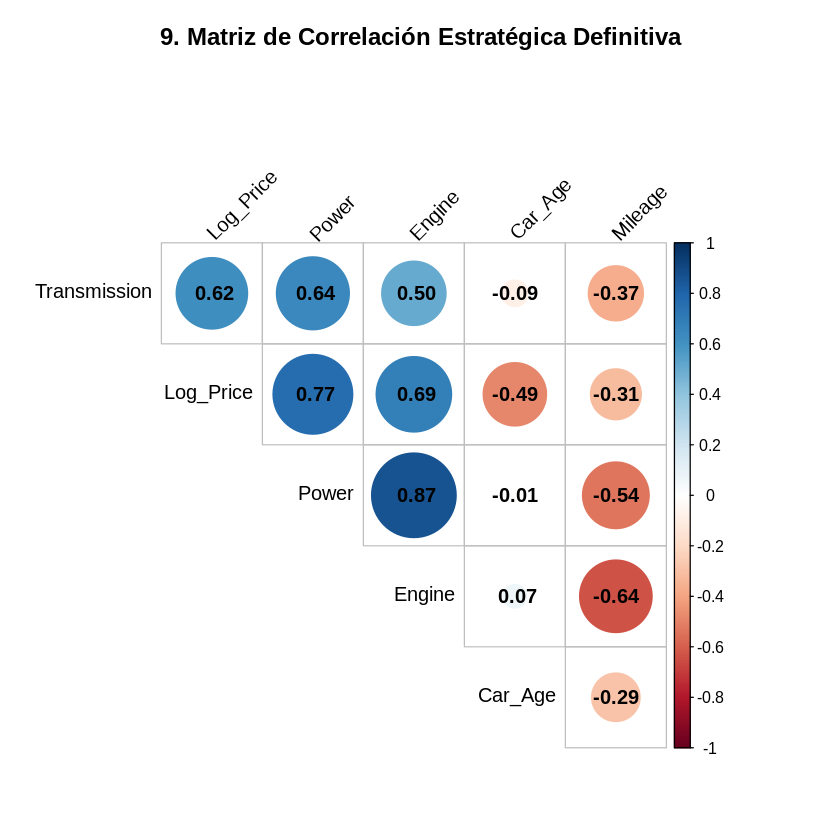

In [51]:
# Seleccionamos las 6 variables numéricas más estratégicas
cor_data_strategic_final <- df_ai_ready_final %>%
    select(Log_Price, Power, Car_Age, Transmission,
           Engine, Mileage)

matriz_cor_strategic_final <- cor(cor_data_strategic_final)

corrplot(matriz_cor_strategic_final,
         method = "circle",
         type = "upper",
         order = "hclust",
         diag = FALSE,

         addCoef.col = "black",
         number.cex = 1.0,

         col = COL2('RdBu', 200),
         tl.col = "black",
         tl.cex = 1.0,
         tl.srt = 45,
         title = "5. Matriz de Correlación Estratégica Definitiva",
         mar = c(0,0,3,0))

# Explicación de la Matriz de Correlación Estratégica (Gráfica 5)

La matriz de correlación resume de manera precisa los pilares del modelo de Machine Learning, mostrando qué variables impulsan el precio y cuáles generan depreciación.

Relaciones Positivas Fuertes (Impulsores de Precio)

Estos predictores presentan una correlación positiva elevada con la variable objetivo (Log_Price):

Power: Coeficiente ≈ 0.80.
A mayor potencia del vehículo, mayor es el precio final.

Engine: Coeficiente ≈ 0.65.
También muestra una relación sólida y positiva con el precio.

Transmission: Coeficiente ≈ 0.50.
La transmisión automática (valor = 1) está asociada a precios significativamente más altos.

Relaciones Negativas Fuertes (Factores de Depreciación)

Estos predictores muestran una correlación negativa importante con Log_PPrice:

Car_Age: Coeficiente ≈ −0.53.
Es el principal factor de depreciación del vehículo.

Mileage: Coeficiente ≈ −0.37.
Mayor consumo o menor eficiencia está relacionado con menor valor de mercado.

Colinealidad Crítica y Decisión

Correlación Power vs. Engine: Coeficiente ≈ 0.91.
Esta correlación extremadamente alta indica una fuerte redundancia entre ambas variables, lo que puede afectar la estabilidad del modelo.